# Review

- Examine data on customer churn 
- Review `groupby` and basic plots

---

Use the data below, from a telecommunications company, to examine the groups in the **churn** column.  This is a `TRUE` or `FALSE` column, representing whether or not a company had retained the customer.  To start, we perform our usual exploration.

In [165]:
import pandas as pd

In [166]:
df = pd.read_csv('data/cell_phone_churn.csv')

In [167]:
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null bool
dtypes: bool(1), float64(8), int64(8), object(3)
memory usage: 498.1+ KB


Now, we can summarise the quantitative variables.  

In [62]:
df.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,call_sum
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,305.137114
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,34.448164
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,191.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,282.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,305.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,328.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,416.000000


## `countplot`

Seaborn's countplot is quite handy here.  We can examine both the number churned and the the counts for customer service call.  Any discrete/finite count variable can be used here.

In [63]:
import seaborn as sns

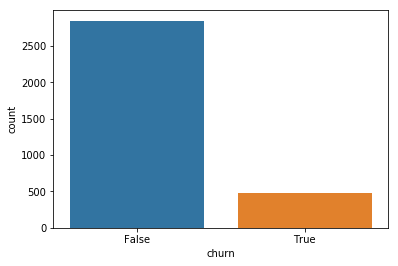

In [169]:
sns.countplot(df.churn)

In [171]:
df.churn.mean()

0.14491449144914492

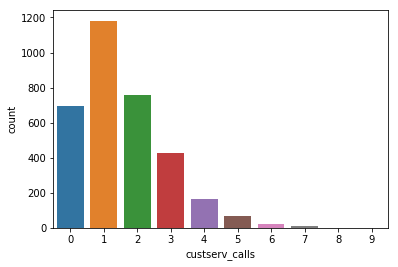

In [176]:
sns.countplot(df.custserv_calls)

In [177]:
df[df['custserv_calls'] == 9]

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
542,MN,152,415,yes,yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True
2380,NJ,53,408,no,no,0,228.6,117,38.86,132.8,123,11.29,227.2,124,10.22,10.1,2,2.73,9,True


In [179]:
df[df['custserv_calls'] >= 5]['churn'].mean()

0.6138613861386139

In [180]:
df[df['custserv_calls'] < 5]['churn'].mean()

0.13025990099009901

## `groupby`

To look at relationships in chunks, we use our `.groupby` method.  First, we can see how many people were churned within the international plan categories.

In [172]:
df.groupby(['intl_plan', 'churn'])['churn'].count()

intl_plan  churn
no         False    2664
           True      346
yes        False     186
           True      137
Name: churn, dtype: int64

In [10]:
df.churn.sum()

483

In [11]:
df.shape

(3333, 20)

In [90]:
df.groupby(['state', 'custserv_calls'])['churn'].count().head()

state  custserv_calls
AK     0                 11
       1                 18
       2                 10
       3                 10
       4                  2
Name: churn, dtype: int64

In [91]:
df['call_sum'] = df.day_calls + df.eve_calls + df.night_calls + df.intl_calls

In [92]:
df['call_sum'].describe()

count    3333.000000
mean      305.137114
std        34.448164
min       191.000000
25%       282.000000
50%       305.000000
75%       328.000000
max       416.000000
Name: call_sum, dtype: float64

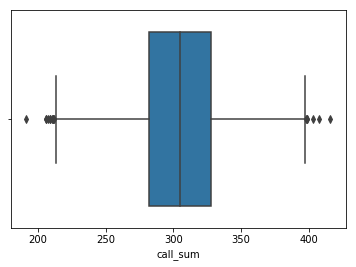

In [93]:
sns.boxplot(df.call_sum)

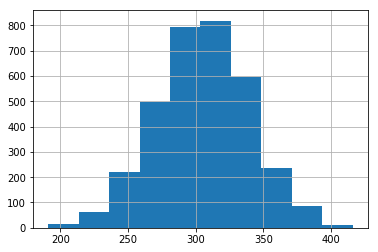

In [94]:
df.call_sum.hist()

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

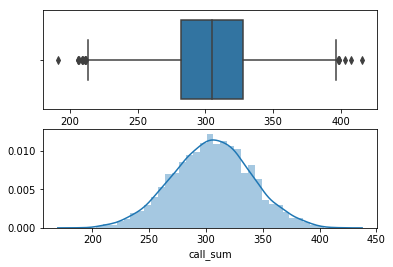

In [102]:
plt.subplot(2, 1, 1)
sns.boxplot(df.call_sum)

plt.subplot(2, 1, 2)
sns.distplot(df.call_sum)

# Webscraping Intro

In [181]:
%%HTML
<h1>Heading</h1>
<p>This is a paragraph <strong>word!!</strong> </p>

In [104]:
url = 'https://www.yelp.com/search?find_desc=Falafel&find_loc=Upper+East+Side%2C+Manhattan%2C+NY&ns=1'

In [105]:
from bs4 import BeautifulSoup
import requests

In [106]:
response = requests.get(url)

In [107]:
response

<Response [200]>

In [108]:
response.text[:100]

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie'

In [109]:
soup = BeautifulSoup(response.text, 'html.parser')

In [110]:
soup.find('span')

<span class="pseudo-input_text">Find</span>

In [111]:
soup.find_all('span')[:10]

[<span class="pseudo-input_text">Find</span>,
 <span class="pseudo-input_field-holder">
 <input aria-autocomplete="list" autocomplete="off" class="main-search_field pseudo-input_field" id="find_desc" maxlength="64" name="find_desc" placeholder="tacos, cheap dinner, Max’s" tabindex="1" value="Falafel">
 </input></span>,
 <span class="pseudo-input_text">Near</span>,
 <span class="main-search_field-holder pseudo-input_field-holder">
 <input aria-autocomplete="list" autocomplete="off" class="main-search_field pseudo-input_field" data-query="Upper East Side, Manhattan, NY" id="dropperText_Mast" maxlength="80" name="find_loc" placeholder="address, neighborhood, city, state or zip" tabindex="2" value="Upper East Side, Manhattan, NY">
 <input name="ns" type="hidden" value="1">
 </input></input></span>,
 <span class="main-search_action-icon-wrap js-search-icon-wrap">
 <span aria-hidden="true" class="icon icon--24-search icon--size-24 icon--inverse icon--fallback-inverted" style="width: 24px; he

In [112]:
soup.find('a')

<a href="#header_find_form" rel="nofollow">
                        Skip to Search Form
                    </a>

In [113]:
soup.find('a', {'data-analytics-label': 'biz-name'})

<a class="biz-name js-analytics-click" data-analytics-label="biz-name" data-hovercard-id="-yguKRKYqeocrcHobtC9iw" href="/adredir?ad_business_id=uuix2xNPXt4nX1w4ZCxMcA&amp;campaign_id=Vo0rlLLGT1TnhScLOV5z9Q&amp;click_origin=search_results&amp;placement=above_search&amp;redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fthe-halal-guys-teterboro-2&amp;request_id=ee4820a416864a17&amp;signature=0e67df043c3462fe2e565c7e8650fa23ceb883474afdeff8ce19d33a04d58d5e&amp;slot=0" target="_blank"><span>The Halal Guys</span></a>

In [114]:
soup.find('a', {'data-analytics-label': 'biz-name'}).text

'The Halal Guys'

In [115]:
rests = soup.find_all('a', {'data-analytics-label': 'biz-name'})

In [116]:
for rest in rests:
    print(rest.text)

The Halal Guys
Hummus Kitchen
Effy’s Kitchen
Gyro96
Taim West Village
Greek Eats
Agora Turkish Restaurant
Casablanca Grill
Sumela Mediterranean Cafe & Grill
King of Falafel & Shawarma - Cart
The Chick Shop
One Lenox
Beyoglu
King of Falafel & Shawarma - Restaurant
Hummus Place
Omar’s Mediterranean East Midtown
Persepolis
Moshe’s Falafel
Sido Falafel & More
Pita Hot
King of Falafel & Shawarma - Truck
The Halal Guys
Grill 212
Saba’s Pizza
Big Boss Halal Food
Maoz Falafel & Grill
Nargila Grill
Taim Midtown
Duzan Mediterranean Grill
Azuri Cafe
Maoz Vegetarian


In [127]:
ratings = soup.find_all('div', {'class': 'biz-rating'})

In [185]:
soup.find('div', {'class': 'biz-rating'}).div.attrs['title']

'3.0 star rating'

In [138]:
for i in ratings:
    print(i.div.attrs['title'])

3.0 star rating
4.0 star rating
4.5 star rating
4.0 star rating
4.5 star rating
4.0 star rating
4.5 star rating
3.5 star rating
4.5 star rating
4.5 star rating
5.0 star rating
4.5 star rating
3.5 star rating
4.0 star rating
4.0 star rating
4.5 star rating
4.0 star rating
4.0 star rating
3.5 star rating
4.0 star rating
4.5 star rating
4.0 star rating
4.0 star rating
3.5 star rating
4.5 star rating
4.0 star rating
3.5 star rating
4.0 star rating
4.0 star rating
4.0 star rating
4.0 star rating


In [140]:
soup.find('p', {'class': 'snippet'}).text

'\n                    “I order here all the time using Uber Eats. It is literally the Bomb.Com. We grew terribly tired of pizza and Chinese being the two main choices in town we decided to take the leap…”\n                        read more\n'

In [142]:
revs = soup.find_all('p', {'class': 'snippet'})

In [143]:
for i in revs:
    print(i.text)


                    “I order here all the time using Uber Eats. It is literally the Bomb.Com. We grew terribly tired of pizza and Chinese being the two main choices in town we decided to take the leap…”
                        read more


                    “If this is your first time in Manhattan and craving Mediterranean food, you have to try this place. I ordered the trio- califlower, grape leaves, and falafel.…”
                        read more


                    “We had brunch here & the food was outstanding. We had a falafel wrap & an egg & potato wrap--both were delicious & very reasonably priced. This place is just…”
                        read more


                    “I had to stop coming here since the one guy was being rude. The food tastes great and this place has very good falafel balls. It's probably the best falafel…”
                        read more


                    “A Hole in the Wall kind of space with great, authentic Middle Eastern street food. Fast 

In [144]:
name = []
rests = soup.find_all('a', {'data-analytics-label': 'biz-name'})

for i in rests:
    name.append(i.text)
 
stars = []

ratings = soup.find_all('div', {'class': 'biz-rating'})

for i in ratings:
    stars.append(i.div.attrs['title'])

snip = []
revs = soup.find_all('p', {'class': 'snippet'})
for i in revs:
    snip.append(i.text)

In [145]:
df = pd.DataFrame({'name': name, 'stars': stars, 'rev_snip': snip})

In [146]:
df.head()

,name,rev_snip,stars
0,The Halal Guys,\n “I order here all the ti...,3.0 star rating
1,Hummus Kitchen,\n “If this is your first t...,4.0 star rating
2,Effy’s Kitchen,\n “We had brunch here & th...,4.5 star rating
3,Gyro96,\n “I had to stop coming he...,4.0 star rating
4,Taim West Village,\n “A Hole in the Wall kind...,4.5 star rating


In [157]:
def yelp_scraper(url):
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    
    name = []
    rests = soup.find_all('a', {'data-analytics-label': 'biz-name'})

    for i in rests:
        name.append(i.text)

    stars = []

    ratings = soup.find_all('div', {'class': 'biz-rating'})

    for i in ratings:
        stars.append(i.div.attrs['title'])

    snip = []
    revs = soup.find_all('p', {'class': 'snippet'})
    for i in revs:
        snip.append(i.text)
        
    df = pd.DataFrame({'name': name, 'stars': stars, 'snip': snip})
    
    return df.head()

In [158]:
yelp_scraper('https://www.yelp.com/search?find_desc=beer&find_loc=Upper+East+Side,+Manhattan,+NY')

,name,snip,stars
0,Yave Tequila,\n “YaVe Tequila is the fir...,5.0 star rating
1,City Swiggers,\n “Found this spot while v...,4.0 star rating
2,City Hops,\n “Great beer shop! Come h...,4.5 star rating
3,The Jeffrey Craft Beer & Bites,\n “They have an extensive ...,4.0 star rating
4,The Pony Bar,\n “This place has a great ...,4.0 star rating


In [162]:
yelp_scraper('https://www.yelp.com/search?find_desc=tofu&find_loc=Manhattan,+NY')

,name,snip,stars
0,Sayori Japanese Restaurant,\n “I don't really write re...,4.5 star rating
1,So Kong Dong,"\n “cucumber, bean sprouts,...",4.0 star rating
2,BCD Tofu House,\n “was quite quick. Find b...,4.0 star rating
3,Natural Tofu Restaurant,\n “Not every dish is amazi...,3.5 star rating
4,Tung Woo Co,"\n “And if you don't know, ...",4.0 star rating


In [164]:
yelp_scraper('https://www.yelp.com/search?find_desc=ninjas&find_loc=Manhattan,+NY')

,name,snip,stars
0,Fusha Asian Cuisine,\n “Service was absolutely ...,3.5 star rating
1,Ninja New York,\n “You have to go through ...,3.5 star rating
2,Ninja Grill,\n “Came here for some lunc...,4.0 star rating
3,Ninja Sushi,\n “Had to review this plac...,4.5 star rating
4,Raku - It’s Japanese II,\n “and they deliver the ro...,4.0 star rating
